<a href="https://colab.research.google.com/github/FERNANDO-SANTILLAN/Repositorio-IA/blob/master/Red_Neuronal_Basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(x_entrenamiento, y_entrenamiento), (x_prueba, y_prueba) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizar los datos (escalar los valores de píxeles entre 0 y 1)
x_entrenamiento = x_entrenamiento / 255.0
x_prueba = x_prueba / 255.0

In [4]:
# Convertir las etiquetas a codificación one-hot
y_entrenamiento = to_categorical(y_entrenamiento, 10)
y_prueba = to_categorical(y_prueba, 10)

In [5]:
# Modelo de red neuronal
modelo = Sequential([
    Flatten(input_shape=(28, 28)),     # Capa de entrada (aplana la imagen)
    Dense(128, activation='relu'),     # Capa oculta con 128 neuronas y ReLU
    Dense(10, activation='softmax')    # Capa de salida (10 clases)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compilación del modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [7]:
# Entrenamiento del modelo
historial = modelo.fit(x_entrenamiento, y_entrenamiento,
                       epochs=5,
                       validation_data=(x_prueba, y_prueba))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8799 - loss: 0.4325 - val_accuracy: 0.9607 - val_loss: 0.1327
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9642 - loss: 0.1207 - val_accuracy: 0.9694 - val_loss: 0.1020
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0812 - val_accuracy: 0.9754 - val_loss: 0.0840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0544 - val_accuracy: 0.9758 - val_loss: 0.0822
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9749 - val_loss: 0.0845


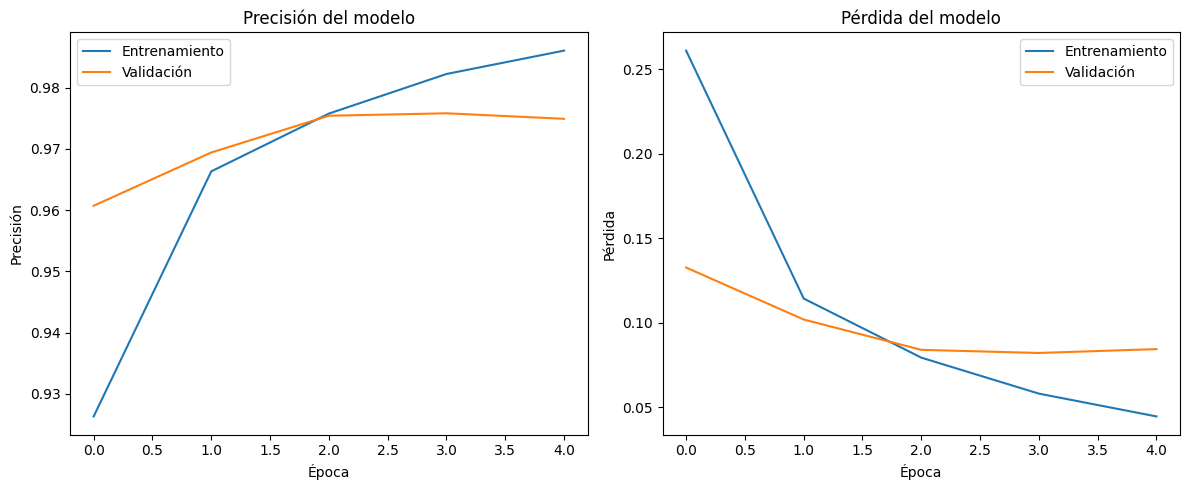

In [9]:
plt.figure(figsize=(12,5))

# Precisión
plt.subplot(1,2,1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1,2,2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Evaluación del modelo con los datos de prueba
pérdida, precisión = modelo.evaluate(x_prueba, y_prueba, verbose=0)
print(f'\nPrecisión en datos de prueba: {precisión:.4f}')


Precisión en datos de prueba: 0.9749
